In [11]:
import yaml
import os
import tifffile as tif
import numpy as np
import random
from skimage.restoration import estimate_sigma
from sklearn.model_selection import train_test_split
from pathlib import Path
import carreno.processing.transforms as tfs
from carreno.pipeline.pipeline import Threshold
import carreno.processing.categorical
import imageio
from skimage.filters import gaussian
#os.chdir("..")

In [2]:
print("current folder", os.getcwd())

infos = {}
with open("config.yml", 'r') as file:
  infos = yaml.safe_load(file)

current folder d:\Etude\LINUM\carreno-cytonemes


In [3]:
inputs = list(os.listdir(infos['VOLUME']['unlabeled']))
fullpath = lambda dir, files : [os.path.join(dir, name) for name in files]
xs = fullpath(infos['VOLUME']['unlabeled'], inputs)
ys = fullpath("../data/dataset/unlabeled_target", inputs)
psf = tif.imread(os.path.join(infos['DIR']['psf'], "Averaged PSF.tif"))
pipeline = Threshold()

In [14]:
print("Starting")
print("--------")

i = 0
print("processing", i, ys[i], " ... ")

x = tif.imread(xs[i])
  
d = pipeline.restore(x,
  psf=psf,
  iteration=60,
  nlm_size=0,
  nlm_dist=0,
  r=50,
  amount=7)

p = pipeline.segmentation(d,
  md_size=[5, 5, 5],
  butterworth=[0.8, 0, -0.1],
  ro=1,
  rc=1.5)

Starting
--------
processing 0 ../data/dataset/unlabeled_target\1-10-GFP-11-20-SlikGFP_21-30-CTDGFP_31-40_NCDP-GFP_41-50-MPSli...GFP_21-30-CTDGFP_31-40_NCDP-GFP_41-50-MPSlikGFP_dsGal4.czi #01.tif  ... 


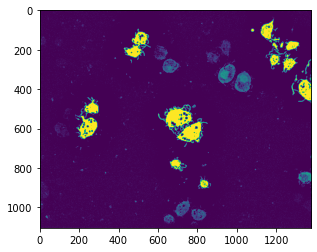

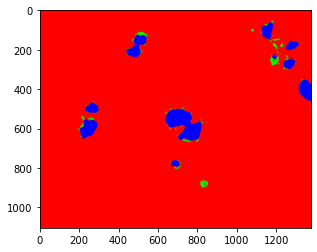

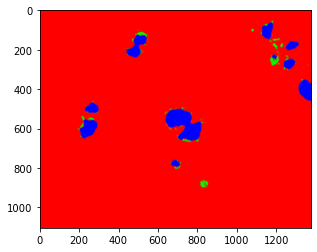

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


: 

In [18]:
import matplotlib.pyplot as plt
plt.imshow(d[15])
plt.show()

plt.imshow(p[15])
plt.show()

blur = gaussian(p[15], 1.5, multichannel=True)
plt.imshow(blur)
plt.show()

imageio.imwrite("C:/Users/User/Pictures/carreno/drawing/1-10-GFP-11-20-SlikGFP_21-30-CTDGFP_31-40_NCDP-GFP_41-50-MPSli...GFP_21-30-CTDGFP_31-40_NCDP-GFP_41-50-MPSlikGFP_dsGal4.czi #01_z15 y.png", blur)

In [ ]:
print("Starting")
print("--------")

for i in range(len(ys)):
  
  print("processing", i, ys[i], " ... ")
  
  x = tif.imread(ys[i])
  
  y = carreno.processing.categorical.categorical_to_sparse(x)
  y = carreno.processing.categorical.sparse_to_categorical(y, 3)
  """
  x = tif.imread(xs[i])
  
  d = pipeline.restore(x,
    psf=psf,
    iteration=60,
    nlm_size=0,
    nlm_dist=0,
    r=10,
    amount=7)
  
  p = pipeline.segmentation(d,
    md_size=[5, 5, 5],
    butterworth=[0.8, 0, -0.1],
    ro=1,
    rc=1.5)
    
  """       
  tif.imwrite(ys[i], y)